In [1]:
# Initialization
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

# Exercise 1

Write a Python script to load data from a CSV file called “genders_heights_weights.csv” from "data" sub-folder. This data consists of 2 features with the targets located at the leftmost column. Use 75% of the data for training and the remaining for testing.

In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split as split

df = read_csv('../data/genders_heights_weights.csv')
df

,Gender,Height,Weight
0,Male,187.6,109.7
1,Male,174.7,73.6
2,Male,188.2,96.5
3,Male,182.2,99.8
4,Male,177.5,93.6
...,...,...,...
9995,Female,168.1,62.0
9996,Female,170.4,77.5
9997,Female,162.2,58.3
9998,Female,175.3,74.3


In [3]:
X = df.values[:, 1:]
y = df.values[:, 0]

X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(7500, 2) (2500, 2)


# Exercise 2

In [4]:
!wget https://raw.githubusercontent.com/wooihaw/ERA3036_T2215/main/data/rescale.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


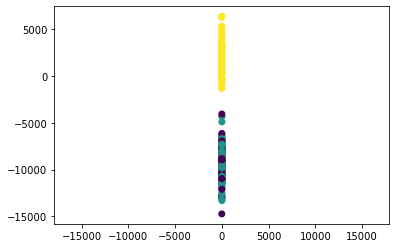

knn1 accuracy: 0.6666666666666666


In [5]:
# Python script for Exercise 2
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.neighbors import KNeighborsClassifier

# Load the dataset
df = read_csv('../data/rescale.csv')

# Split into features (X) and targets (y)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Further split the data into training and testing sets
X1_train, X1_test, y_train, y_test = split(X, y, random_state=42)

# Plot the features
xx = X1_train[:, 0]
yy = X1_train[:, 1]
plt.scatter(xx, yy, c=y_train)
plt.axis('equal')
plt.show()

# Train a kNN classifer and evaluate its performance on the dataset
knn1 = KNeighborsClassifier().fit(X1_train, y_train)
print(f'knn1 accuracy: {knn1.score(X1_test, y_test)}')

To do: 
- Use MinMaxScaler to scale the features.
- Plot the resulting scaled fetures.
- Train a kNN classifier based on the scaled features. 
- Evaluate its performance

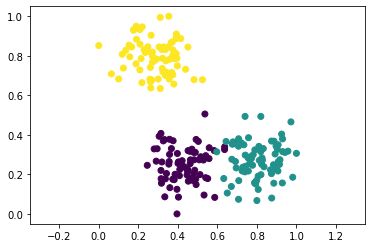

knn2 accuracy: 0.9866666666666667


In [6]:
from sklearn.preprocessing import MinMaxScaler

scl = MinMaxScaler()
X2_train = scl.fit_transform(X1_train)
X2_test = scl.transform(X1_test)

# Plot the features
xx = X2_train[:, 0]
yy = X2_train[:, 1]
plt.scatter(xx, yy, c=y_train)
plt.axis('equal')
plt.show()

# Train a kNN classifer and evaluate its performance on the dataset
knn2 = KNeighborsClassifier().fit(X2_train, y_train)
print(f'knn2 accuracy: {knn2.score(X2_test, y_test)}')

# Exercise 3

The sinking of the RMS Titanic is one of the most infamous tragedy in history. In this hands-on, a machine learning system will be developed to predict which passengers survived the tragedy.
![Image of Titanic](https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/450px-RMS_Titanic_3.jpg)

In [7]:
# Load the dataset
import pandas as pd
df = pd.read_csv('../data/titanic.csv')

In [8]:
# Preview 10 lines of dataset
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
# Statistical summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# Check for missing data
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
# Select the relevant columns only
selected = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']
df1 = df[selected]

To do: Replace the missing data (imputation) using the statistics (mean, median etc.)

In [12]:
df1['Age'].fillna(df1['Age'].median(), inplace=True)

To do: Check whether there is any more missing data

In [13]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
Survived    0
dtype: int64

To do: 
- Remove the samples with missing data.
- Use get_dummies() function from pandas to convert categorical features into one hot encoding. 

In [14]:
df1.dropna(inplace=True)
df2 = pd.get_dummies(df1)
df2

,Pclass,Age,SibSp,Parch,Fare,Survived,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,0,1,0,0,1
887,1,19.0,0,0,30.0000,1,1,0,0,0,1
888,3,28.0,1,2,23.4500,0,1,0,0,0,1
889,1,26.0,0,0,30.0000,1,0,1,1,0,0


To do: 
- Store the features as variable X and targets as variable y
- Split the data into training set and testing test

In [15]:
from sklearn.model_selection import train_test_split as split
y = df2['Survived'].values
del df2['Survived']
X = df2.values

X_train, X_test, y_train, y_test = split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

(666, 10) (223, 10)


To do: Use grid search to fine tune the hyperparameters of Decition Tree Classifier (do this after Chapter 3)